In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities): 

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | selfoss
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | rabo de peixe
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | amapa
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | magadan
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | mogadishu
Processing Record 13 of Set 1 | mitsamiouli
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | high level
Processing Record 16 of Set 1 | morondava
Processing Record 17 of Set 1 | fairhope
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | yarensk
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | atambua
Processing Record 22 of Set 1 | los banos
Processing Record 2

Processing Record 36 of Set 4 | chulym
Processing Record 37 of Set 4 | saleaula
City not found. Skipping...
Processing Record 38 of Set 4 | avarua
Processing Record 39 of Set 4 | fernley
Processing Record 40 of Set 4 | sioux lookout
Processing Record 41 of Set 4 | kamenka
Processing Record 42 of Set 4 | kars
Processing Record 43 of Set 4 | hay river
Processing Record 44 of Set 4 | vila do maio
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | colares
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | yorosso
Processing Record 49 of Set 4 | teknaf
Processing Record 50 of Set 4 | ocos
Processing Record 1 of Set 5 | xining
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | gambela
Processing Record 4 of Set 5 | san jose
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | kyren
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | c

Processing Record 27 of Set 8 | chara
Processing Record 28 of Set 8 | lamu
Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | hofn
Processing Record 31 of Set 8 | chik
Processing Record 32 of Set 8 | iqaluit
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | coihaique
Processing Record 35 of Set 8 | komsomolsk
Processing Record 36 of Set 8 | bozdar
Processing Record 37 of Set 8 | auki
Processing Record 38 of Set 8 | luanda
Processing Record 39 of Set 8 | warqla
City not found. Skipping...
Processing Record 40 of Set 8 | nara
Processing Record 41 of Set 8 | sira
Processing Record 42 of Set 8 | malangali
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | sembakung
Processing Record 45 of Set 8 | tatawin
Processing Record 46 of Set 8 | torbay
Processing Record 47 of Set 8 | svetlogorsk
Processing Record 48 of Set 8 | doka
Processing Record 49 of Set 8 | beberibe
Processing Record 50 of Set 8 | coll

Processing Record 22 of Set 12 | shimoda
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | kendari
Processing Record 25 of Set 12 | mions
Processing Record 26 of Set 12 | lata
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | tunduru
City not found. Skipping...
Processing Record 29 of Set 12 | porbandar
Processing Record 30 of Set 12 | ovruch
Processing Record 31 of Set 12 | sainte-maxime
Processing Record 32 of Set 12 | tartus
Processing Record 33 of Set 12 | ucluelet
Processing Record 34 of Set 12 | buckeye
Processing Record 35 of Set 12 | narok
Processing Record 36 of Set 12 | buarcos
Processing Record 37 of Set 12 | uvat
Processing Record 38 of Set 12 | waterloo
Processing Record 39 of Set 12 | mackenzie
Processing Record 40 of Set 12 | hurghada
Processing Record 41 of Set 12 | alice springs
Processing Record 42 of Set 12 | van buren
Processing Record 43 of Set 12 | malakal
Processing Record 44 of Set 12 | shellbrook
Processing Recor

In [10]:
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.08,77,19,12.91,PF,2022-02-13 22:52:14
1,Selfoss,63.9331,-20.9971,28.29,91,100,9.15,IS,2022-02-13 22:52:14
2,New Norfolk,-42.7826,147.0587,62.92,67,96,3.13,AU,2022-02-13 22:47:54
3,Rabo De Peixe,37.8000,-25.5833,58.28,82,75,6.91,PT,2022-02-13 22:52:15
4,Rikitea,-23.1203,-134.9692,78.62,71,66,12.82,PF,2022-02-13 22:52:15
5,Khatanga,71.9667,102.5000,-26.57,97,75,2.68,RU,2022-02-13 22:49:21
6,Faanui,-16.4833,-151.7500,80.92,73,100,13.89,PF,2022-02-13 22:52:15
7,Amapa,1.0000,-52.0000,73.22,96,92,4.07,BR,2022-02-13 22:52:15
8,Albany,42.6001,-73.9662,24.10,55,100,4.00,US,2022-02-13 22:47:17
9,Magadan,59.5667,150.8000,-1.52,66,55,9.33,RU,2022-02-13 22:52:16


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-02-13 22:52:14,-9.8000,-139.0333,78.08,77,19,12.91
1,Selfoss,IS,2022-02-13 22:52:14,63.9331,-20.9971,28.29,91,100,9.15
2,New Norfolk,AU,2022-02-13 22:47:54,-42.7826,147.0587,62.92,67,96,3.13
3,Rabo De Peixe,PT,2022-02-13 22:52:15,37.8000,-25.5833,58.28,82,75,6.91
4,Rikitea,PF,2022-02-13 22:52:15,-23.1203,-134.9692,78.62,71,66,12.82
...,...,...,...,...,...,...,...,...,...
568,Ketchikan,US,2022-02-13 23:06:19,55.3422,-131.6461,48.18,87,100,5.75
569,Chengde,CN,2022-02-13 23:06:19,40.9725,117.9361,11.05,73,79,5.48
570,Lebork,PL,2022-02-13 23:06:19,54.5392,17.7501,37.92,71,100,13.67
571,Littleton,US,2022-02-13 23:04:26,39.6133,-105.0166,56.35,20,20,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

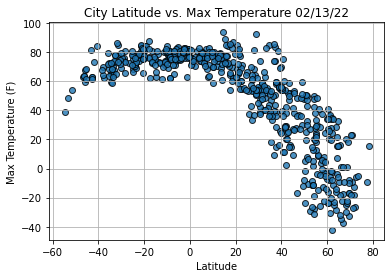

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

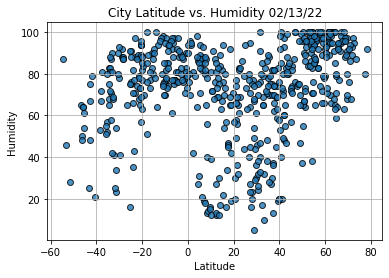

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

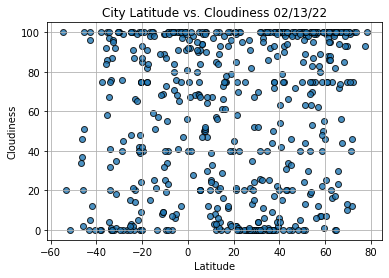

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

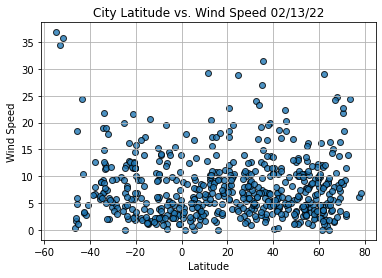

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [20]:
index13 = city_data_df.loc[13]
index13   

City                        Bluff
Country                        NZ
Date          2022-02-13 22:49:20
Lat                         -46.6
Lng                      168.3333
Max Temp                     62.8
Humidity                       65
Cloudiness                     34
Wind Speed                   0.34
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
568     True
569     True
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Selfoss,IS,2022-02-13 22:52:14,63.9331,-20.9971,28.29,91,100,9.15
3,Rabo De Peixe,PT,2022-02-13 22:52:15,37.8000,-25.5833,58.28,82,75,6.91
5,Khatanga,RU,2022-02-13 22:49:21,71.9667,102.5000,-26.57,97,75,2.68
7,Amapa,BR,2022-02-13 22:52:15,1.0000,-52.0000,73.22,96,92,4.07
8,Albany,US,2022-02-13 22:47:17,42.6001,-73.9662,24.10,55,100,4.00
...,...,...,...,...,...,...,...,...,...
568,Ketchikan,US,2022-02-13 23:06:19,55.3422,-131.6461,48.18,87,100,5.75
569,Chengde,CN,2022-02-13 23:06:19,40.9725,117.9361,11.05,73,79,5.48
570,Lebork,PL,2022-02-13 23:06:19,54.5392,17.7501,37.92,71,100,13.67
571,Littleton,US,2022-02-13 23:04:26,39.6133,-105.0166,56.35,20,20,11.50


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Selfoss,IS,2022-02-13 22:52:14,63.9331,-20.9971,28.29,91,100,9.15
3,Rabo De Peixe,PT,2022-02-13 22:52:15,37.8000,-25.5833,58.28,82,75,6.91
5,Khatanga,RU,2022-02-13 22:49:21,71.9667,102.5000,-26.57,97,75,2.68
7,Amapa,BR,2022-02-13 22:52:15,1.0000,-52.0000,73.22,96,92,4.07
8,Albany,US,2022-02-13 22:47:17,42.6001,-73.9662,24.10,55,100,4.00


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

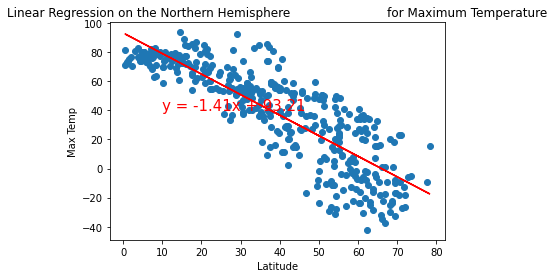

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
 # plt.show()

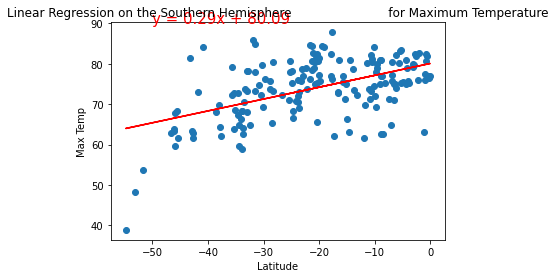

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
# plt.show()

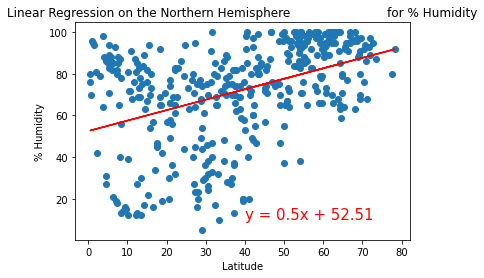

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
plt.show()

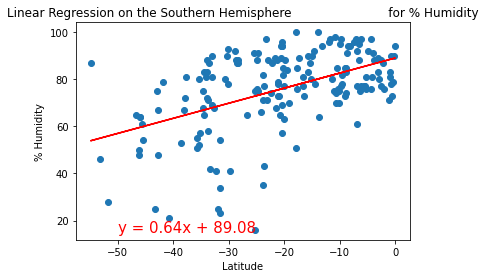

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
plt.show()

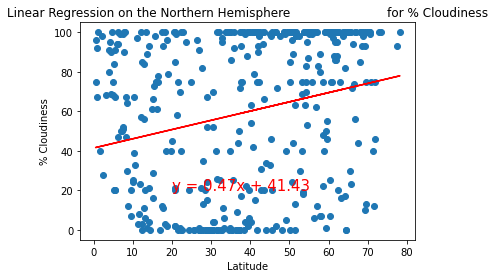

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,20))
plt.show()

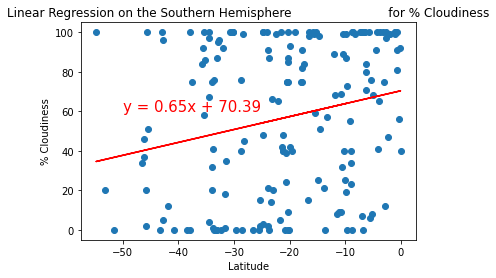

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
plt.show()

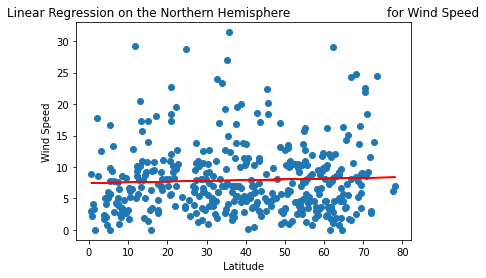

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))
plt.show()

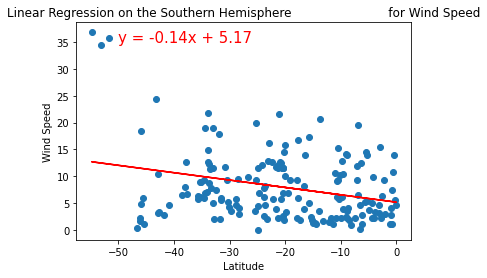

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
plt.show()